# Домашнее задание 1
***
Анастасия Добрынина, БКЛ-211

In [1]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\79998\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
from nltk.corpus import wordnet as wn

In [3]:
from collections import Counter

In [4]:
from collections import defaultdict

In [5]:
import networkx as nx

In [6]:
from itertools import combinations

In [7]:
import matplotlib.pyplot as plt 

In [8]:
from networkx.algorithms import community

# Шаг 1 (0.3 балла)
В базе WordNet возьмите синсет 'search.v.01'. Из всех языков, которые есть в базе, извлеките списки лемм, относящихся к этому синсету.

NB! Если вы возьмете в качестве стартового не этот синсет, а любой другой, это принесет вам 1 бонусный балл. Но будьте внимательны: в этом случае вам нужно будет самостоятельно регулировать ограничения на количество колексификаций из шага 2 так, чтобы в итоговом графе было не меньше 30 и не больше 60 узлов.

In [9]:
wn.synset('love.v.04').definition()

'have sexual intercourse with'

Возьму синсет *любить* в значении 'иметь половой акт'. Так как это табуированная семантическая зона, здесь можно ожидать много колексификаций с глаголами из других зон.

In [10]:
synset = wn.synset('love.v.04')

In [11]:
# активируем другие языки
synset.lemma_names('fra')

['aimer',
 'avoir',
 'avoir_des_relations_sexuelles',
 'baiser',
 'bien',
 'connaître',
 'enconner',
 'enculer',
 "faire_l'amour",
 'fourrer',
 'foutre',
 'niquer',
 'savoir']

In [12]:
wn.langs()

['eng',
 'als',
 'arb',
 'bul',
 'cmn',
 'dan',
 'ell',
 'fin',
 'fra',
 'heb',
 'hrv',
 'isl',
 'ita',
 'ita_iwn',
 'jpn',
 'cat',
 'eus',
 'glg',
 'spa',
 'ind',
 'zsm',
 'nld',
 'nno',
 'nob',
 'pol',
 'por',
 'ron',
 'lit',
 'slk',
 'slv',
 'swe',
 'tha']

In [13]:
lemmas = {}
for lang in wn.langs():
    lemmas[lang] = synset.lemma_names(lang)

C:\Users\79998\anaconda3\Lib\site-packages\nltk\corpus\reader\wordnet.py:1564: UserWarning: No WordNet synset found for pos=a at offset=1498548.
  warnings.warn(f"No WordNet synset found for pos={pos} at offset={offset}.")
C:\Users\79998\anaconda3\Lib\site-packages\nltk\corpus\reader\wordnet.py:1564: UserWarning: No WordNet synset found for pos=a at offset=1505508.
  warnings.warn(f"No WordNet synset found for pos={pos} at offset={offset}.")
C:\Users\79998\anaconda3\Lib\site-packages\nltk\corpus\reader\wordnet.py:1564: UserWarning: No WordNet synset found for pos=a at offset=2002046.
  warnings.warn(f"No WordNet synset found for pos={pos} at offset={offset}.")
C:\Users\79998\anaconda3\Lib\site-packages\nltk\corpus\reader\wordnet.py:1564: UserWarning: No WordNet synset found for pos=a at offset=2917945.
  warnings.warn(f"No WordNet synset found for pos={pos} at offset={offset}.")


In [14]:
# посмотрим на получившийся словарь
for item, n in zip(lemmas.items(), range(5)):
    print(item)

('eng', ['sleep_together', 'roll_in_the_hay', 'love', 'make_out', 'make_love', 'sleep_with', 'get_laid', 'have_sex', 'know', 'do_it', 'be_intimate', 'have_intercourse', 'have_it_away', 'have_it_off', 'screw', 'fuck', 'jazz', 'eff', 'hump', 'lie_with', 'bed', 'have_a_go_at_it', 'bang', 'get_it_on', 'bonk'])
('als', ['bang', 'be_intimate', 'bed', 'bonk', 'do_it', 'eff', 'fuck', 'get_it_on', 'get_laid', 'have_a_go_at_it', 'have_intercourse', 'have_it_away', 'have_it_off', 'have_sex', 'hump', 'jazz', 'know', 'lie_with', 'love', 'make_love', 'make_out', 'roll_in_the_hay', 'screw', 'sleep_with'])
('arb', ['أصلح_بالمفك', 'أضاع_الوقت', 'اتهم', 'اِتّصل_جِنْسِيّاً', 'برهن', 'ترنح', 'تلفظ_بحماقات', 'تلولب', 'تلوى', 'جامع', 'حدث_ضجة_عالية', 'خبط', 'دار', 'درى', 'شاطر', 'شغف_ب', 'ضاجع', 'ضرب_بعنف', 'ضغط', 'طرف', 'عانى', 'عرف', 'عرف_جيدا', 'عرف_شخص', 'عشق', 'علم', 'غازل', 'غرس', 'غلق_بقوة', 'فتن', 'فهم', 'قذف_بقوة', 'قرع', 'قص_شعر_الناصية', 'لاحظ', 'لولب', 'لوى', 'ميز', 'نام_مع', 'نجح', 'نكح', 'هزم'

# Шаг 2 (0.7 балла)
Теперь, наоборот, для каждой леммы из каждого языка составьте список синсетов, к которым она относится. Из этих синсетов выберите такие, к которым относится больше 3 лемм из нашего изначального списка (надеемся, что это поможет нам выделить более устойчивые и надежные связи). Оставшиеся синсеты и станут узлами нашего графа.

In [15]:
cnt = Counter()
for lang, lemmas_list in lemmas.items():
    for lemma in lemmas_list:
        for synset in wn.synsets(lemma, lang = lang):
            cnt[synset] += 1

In [16]:
len(cnt)

584

In [17]:
filtered_cnt = {word: count for word, count in cnt.items() if count > 3}


In [18]:
len(filtered_cnt)

34

In [19]:
filtered_cnt

{Synset('sleep_together.v.01'): 269,
 Synset('fuck.n.01'): 6,
 Synset('love.v.01'): 14,
 Synset('love.v.02'): 4,
 Synset('love.v.03'): 6,
 Synset('spot.v.02'): 5,
 Synset('know.n.01'): 7,
 Synset('know.v.01'): 23,
 Synset('know.v.02'): 12,
 Synset('know.v.03'): 17,
 Synset('know.v.04'): 13,
 Synset('know.v.05'): 15,
 Synset('acknowledge.v.06'): 12,
 Synset('know.v.07'): 6,
 Synset('know.v.09'): 14,
 Synset('know.v.10'): 6,
 Synset('know.v.11'): 14,
 Synset('go_to_bed.v.01'): 4,
 Synset('slam.v.01'): 11,
 Synset('weave.v.04'): 5,
 Synset('copulate.v.01'): 6,
 Synset('sleep.v.01'): 6,
 Synset('experience.v.01'): 4,
 Synset('learn.v.02'): 5,
 Synset('recognize.v.04'): 5,
 Synset('recognize.v.02'): 4,
 Synset('determine.v.08'): 4,
 Synset('visualize.v.01'): 4,
 Synset('realize.v.03'): 5,
 Synset('identify.v.01'): 5,
 Synset('lie_down.v.01'): 4,
 Synset('take.v.35'): 4,
 Synset('identify.v.06'): 4,
 Synset('identify.v.05'): 4}

# Шаг 3 (1 балл)
Теперь строим ребра. Ребро между двумя синсетами ставьте в том случае, если хотя бы в одном языке есть хотя бы одна лемма, которая относится к ним обоим. Пусть граф будет взвешенным: вес ребра будет отражать количество лемм, относящихся к обоим узлам пары.

NB! На этом шаге мы уже забываем про исходный список лемм из шага 1 (он нам нужен был только для отбора синсетов) и учитываем все леммы, относящиеся к отобранным узлам.

Критерии: 0.5 балла - ребра, 0.5 балла - вес ребер

Сделаем словарь {лемма: [синсет1, синсет2], ...}. Так мы сразу увидим, какие синсеты могут задаваться той или иной леммой. Далее для каждой пары синсетов, к которым относится эта лемма, с помощью itertools.combinations посчитаем, сколько раз эта пара встретилась в синсетах разных лемм

In [20]:
# получаем нужный словарь
lemmas_dict = defaultdict(list)
for lang in wn.langs():
    for synset in filtered_cnt.keys():
        for lemma in synset.lemma_names(lang):
            lemmas_dict[lemma].append(synset.name())

In [21]:
# пример комбинаций
list(combinations(lemmas_dict['love'], r = 2))

[('sleep_together.v.01', 'love.v.01'),
 ('sleep_together.v.01', 'love.v.02'),
 ('sleep_together.v.01', 'love.v.03'),
 ('sleep_together.v.01', 'sleep_together.v.01'),
 ('love.v.01', 'love.v.02'),
 ('love.v.01', 'love.v.03'),
 ('love.v.01', 'sleep_together.v.01'),
 ('love.v.02', 'love.v.03'),
 ('love.v.02', 'sleep_together.v.01'),
 ('love.v.03', 'sleep_together.v.01')]

In [22]:
# считаем веса ребер
edge_counter = Counter()
for lemma, synset_list in lemmas_dict.items():
    for combination in combinations(synset_list, r = 2):
        if combination[0] == combination[1]:
            pass
        else: 
            if combination[::-1] in edge_counter.keys():
                edge_counter[combination[::-1]] += 1
            else: 
                edge_counter[combination] += 1

In [23]:
graph = nx.Graph()
graph.add_nodes_from([synset.name() for synset in filtered_cnt.keys()])
graph.add_weighted_edges_from([(key[0], key[1], value) for key, value in edge_counter.items()])

In [24]:
graph.number_of_edges()

237

In [25]:
graph.number_of_nodes()

34

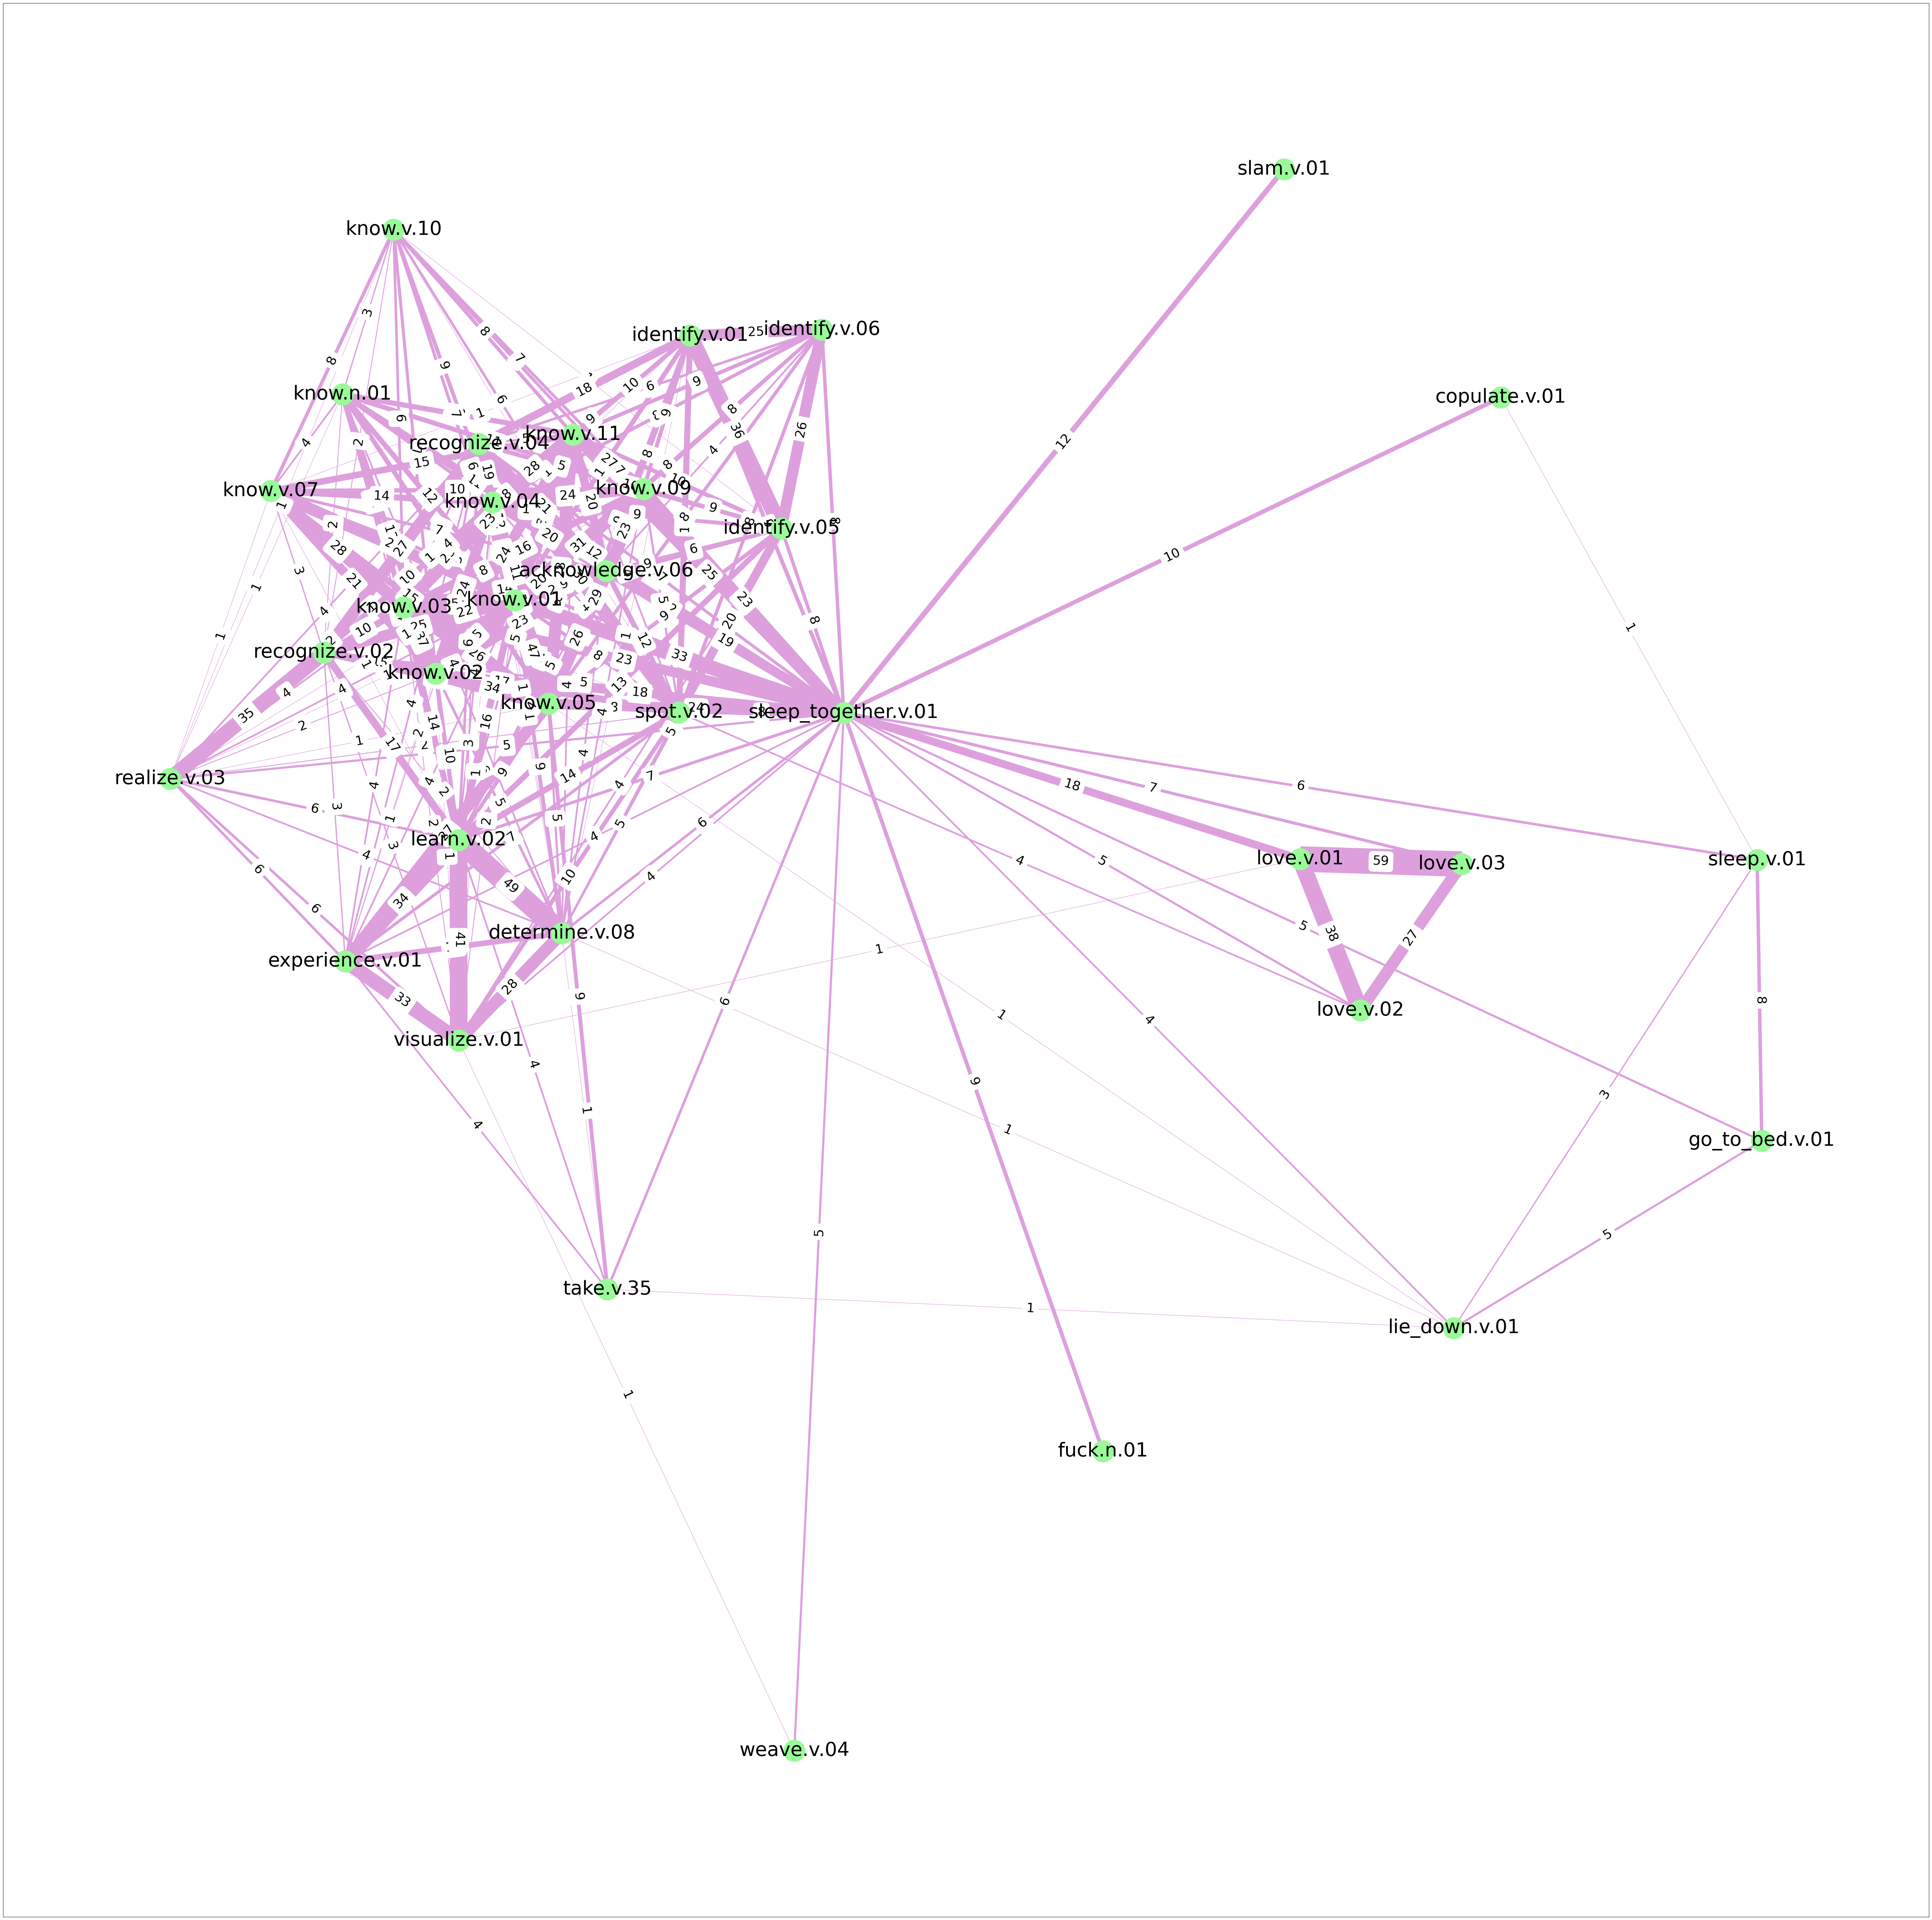

In [26]:
pos=nx.spring_layout(graph)
plt.figure(figsize=(80, 80))
nx.draw_networkx_nodes(graph, pos, node_color='PaleGreen', node_size=2500) 
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edges(graph, pos, edge_color='Plum', arrows=False, width = list(labels.values()))

nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels, font_size=30)

nx.draw_networkx_labels(graph, pos, font_size=45)

plt.show()

# Шаг 4 (3 балла)
Проанализируйте получившийся граф. Сколько получилось связных компонент? Какая у этого графа плотность? Как распределились (взвешенные) степени узлов? Какие узлы оказались центральными (попробуйте несколько метрик, например, degree centrality и eigencentrality, прокомментируйте результат)? Разбейте граф на сообщества (поиграйте с несколькими алгоритмами) и прокомментируйте результаты.

Критерии: 0.5 - связные компоненты, 0.5 - плотность графа, 1 - степени и центральность узлов, 1 - сообщества

### Выделение связных компонент

In [27]:
components = nx.components.connected_components(graph)

component_lengths = Counter([len(i) for i in components])

component_lengths

Counter({34: 1})

У графа одна связная компонента, следовательно, все предстваленне значения так или инчае связаны между собой

### Плотность графа

In [28]:
nx.density(graph)

0.42245989304812837

Это значит, что существует чуть меньше половины всех возможных связей между вершинами

In [29]:
# Диаметр графа, самый длинный кратчайший путь от одной вершины до другой
print(nx.diameter(graph))

2


In [30]:
print('Среднее расстояние: ', nx.average_shortest_path_length(graph))

Среднее расстояние:  1.5775401069518717


### Коэффициент ассортативности 

насколько вся сеть завязана на основных "хабах" = узлах с большим количеством связей


In [31]:
nx.degree_pearson_correlation_coefficient(graph)

-0.12016468740331746

Коэффициент низкий, значит, граф не полностью строится на узлах с большим количеством связей

### Степени и центральность

In [32]:
# топ по взвешенным степеням
deg = nx.degree_centrality(graph)
for n, nodeid in enumerate(sorted(deg, key=deg.get, reverse=True)):
    print(f'{n+1}. {nodeid}')

1. sleep_together.v.01
2. know.v.05
3. know.v.01
4. know.v.04
5. recognize.v.02
6. determine.v.08
7. spot.v.02
8. know.v.03
9. acknowledge.v.06
10. know.v.09
11. know.v.11
12. learn.v.02
13. realize.v.03
14. recognize.v.04
15. know.v.02
16. identify.v.05
17. know.v.07
18. identify.v.01
19. know.n.01
20. know.v.10
21. visualize.v.01
22. experience.v.01
23. identify.v.06
24. lie_down.v.01
25. take.v.35
26. love.v.01
27. love.v.02
28. sleep.v.01
29. love.v.03
30. go_to_bed.v.01
31. weave.v.04
32. copulate.v.01
33. fuck.n.01
34. slam.v.01


Не удивительный результат: даже визуально заметно, что *sleep_together* занимает центральную позицию в графе, от него исходит больше всего ребер, и это ребра с самым большим весом. Синсеты, обозначаемые сленгововыми словами *fuck*, *slame*, *weave*, а также *copulate* имеют наименьшее количество связей

Посмотрим на другие метрики центральности

In [33]:
#по количеству кратчайших путей, проходящих через узел
b = nx.betweenness_centrality(graph)
for n, nodeid in enumerate(sorted(b, key=b.get, reverse=True)):
    print(f'{n+1}. {nodeid}')

1. sleep_together.v.01
2. know.v.05
3. visualize.v.01
4. spot.v.02
5. determine.v.08
6. learn.v.02
7. know.v.01
8. know.v.04
9. lie_down.v.01
10. recognize.v.02
11. know.v.03
12. realize.v.03
13. recognize.v.04
14. acknowledge.v.06
15. know.v.09
16. know.v.11
17. experience.v.01
18. identify.v.05
19. know.v.02
20. sleep.v.01
21. love.v.01
22. love.v.02
23. identify.v.01
24. know.v.07
25. take.v.35
26. know.v.10
27. know.n.01
28. fuck.n.01
29. love.v.03
30. go_to_bed.v.01
31. slam.v.01
32. weave.v.04
33. copulate.v.01
34. identify.v.06


In [34]:
#топ по пути до всех остальных узлов
b = nx.closeness_centrality(graph)
for n, nodeid in enumerate(sorted(b, key=b.get, reverse=True)):
    print(f'{n+1}. {nodeid}')

1. sleep_together.v.01
2. know.v.05
3. know.v.01
4. know.v.04
5. recognize.v.02
6. determine.v.08
7. spot.v.02
8. know.v.03
9. acknowledge.v.06
10. know.v.09
11. know.v.11
12. learn.v.02
13. realize.v.03
14. recognize.v.04
15. know.v.02
16. identify.v.05
17. know.v.07
18. identify.v.01
19. know.n.01
20. know.v.10
21. visualize.v.01
22. experience.v.01
23. identify.v.06
24. lie_down.v.01
25. take.v.35
26. love.v.01
27. love.v.02
28. sleep.v.01
29. love.v.03
30. go_to_bed.v.01
31. weave.v.04
32. copulate.v.01
33. fuck.n.01
34. slam.v.01


In [35]:
#топ по друзьям друзей
b = nx.eigenvector_centrality(graph)
for n, nodeid in enumerate(sorted(b, key=b.get, reverse=True)):
    print(f'{n+1}. {nodeid}')

1. sleep_together.v.01
2. know.v.01
3. know.v.04
4. know.v.05
5. recognize.v.02
6. acknowledge.v.06
7. know.v.09
8. know.v.11
9. know.v.03
10. realize.v.03
11. determine.v.08
12. learn.v.02
13. recognize.v.04
14. spot.v.02
15. know.v.02
16. identify.v.05
17. identify.v.01
18. know.v.07
19. know.n.01
20. know.v.10
21. experience.v.01
22. visualize.v.01
23. identify.v.06
24. take.v.35
25. lie_down.v.01
26. love.v.02
27. love.v.01
28. weave.v.04
29. sleep.v.01
30. go_to_bed.v.01
31. love.v.03
32. copulate.v.01
33. fuck.n.01
34. slam.v.01


В любой метрике самым важным оказывается узел *sleep_together*, за ним следует *know.v.05 ('have firsthand knowledge of states, situations, emotions, or sensations')* во всех метриках кроме eigenvector_centrality

Внизу рейтинка находтся стабильно находятся сленговые выражения *fuck*, *slame*, *weave*, более научное *copulate*. betweenness_centrality же ставит на последнее место *identify.v.06*

### Разбиение на сообщества

In [36]:
# в какой степени узлы стремятся разбиться на сообщетсва
print(nx.average_clustering(graph))

0.7812119767018296


Коэффициент высокий, следовательно, скорее всего получим разбиение

In [37]:
communities_generator = community.girvan_newman(graph) # убирает постепенно по ребру с наиболее высокой betweenness centrality
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print("top level communities:", sorted(map(sorted, top_level_communities)))
print("next level communities:", sorted(map(sorted, next_level_communities)))

top level communities: [['acknowledge.v.06', 'copulate.v.01', 'determine.v.08', 'experience.v.01', 'go_to_bed.v.01', 'identify.v.01', 'identify.v.05', 'identify.v.06', 'know.n.01', 'know.v.01', 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'know.v.07', 'know.v.09', 'know.v.10', 'know.v.11', 'learn.v.02', 'lie_down.v.01', 'love.v.01', 'love.v.02', 'love.v.03', 'realize.v.03', 'recognize.v.02', 'recognize.v.04', 'slam.v.01', 'sleep.v.01', 'sleep_together.v.01', 'spot.v.02', 'take.v.35', 'visualize.v.01', 'weave.v.04'], ['fuck.n.01']]
next level communities: [['acknowledge.v.06', 'copulate.v.01', 'determine.v.08', 'experience.v.01', 'go_to_bed.v.01', 'identify.v.01', 'identify.v.05', 'identify.v.06', 'know.n.01', 'know.v.01', 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'know.v.07', 'know.v.09', 'know.v.10', 'know.v.11', 'learn.v.02', 'lie_down.v.01', 'love.v.01', 'love.v.02', 'love.v.03', 'realize.v.03', 'recognize.v.02', 'recognize.v.04', 'sleep.v.01', 'sleep_together.v.01'

Не вполне осмысленное разбиение. Сначала в отдельную группу выделяется только *fuck* с меньшей вероятностью отделяется еще и *slam*

In [38]:
communities_generator_2 = community.greedy_modularity_communities(graph) # данный алгоритм использует модулярность, которая в свою очередь опирается на плотность связей внутри группы
communities_generator_2

[frozenset({'acknowledge.v.06',
            'identify.v.01',
            'identify.v.05',
            'identify.v.06',
            'know.n.01',
            'know.v.01',
            'know.v.02',
            'know.v.03',
            'know.v.04',
            'know.v.05',
            'know.v.07',
            'know.v.09',
            'know.v.10',
            'know.v.11',
            'learn.v.02',
            'realize.v.03',
            'recognize.v.02',
            'recognize.v.04',
            'spot.v.02'}),
 frozenset({'copulate.v.01',
            'determine.v.08',
            'experience.v.01',
            'fuck.n.01',
            'go_to_bed.v.01',
            'lie_down.v.01',
            'love.v.01',
            'love.v.02',
            'love.v.03',
            'slam.v.01',
            'sleep.v.01',
            'sleep_together.v.01',
            'take.v.35',
            'visualize.v.01',
            'weave.v.04'})]

Все еще имеем два сообщества, но теперь более содержательные: в первом сообществе находятся только глаголы со значением умственной деятельности, "познания". Во второую группу подобные глаголы тоже проникли (*visualize*, *determine*), и в целом вторая группа неоднородна.

Попробуем раздилить на две части с помощью другого алгоритма

In [39]:
community.kernighan_lin_bisection(graph, seed = 42)

({'acknowledge.v.06',
  'identify.v.01',
  'identify.v.05',
  'identify.v.06',
  'know.n.01',
  'know.v.01',
  'know.v.02',
  'know.v.03',
  'know.v.04',
  'know.v.05',
  'know.v.07',
  'know.v.09',
  'know.v.11',
  'recognize.v.02',
  'recognize.v.04',
  'sleep_together.v.01',
  'spot.v.02'},
 {'copulate.v.01',
  'determine.v.08',
  'experience.v.01',
  'fuck.n.01',
  'go_to_bed.v.01',
  'know.v.10',
  'learn.v.02',
  'lie_down.v.01',
  'love.v.01',
  'love.v.02',
  'love.v.03',
  'realize.v.03',
  'slam.v.01',
  'sleep.v.01',
  'take.v.35',
  'visualize.v.01',
  'weave.v.04'})

Так же есть тенденция выделить в отдельную группу глаголы познания

Посмотрим на k-clique community

In [40]:
list(nx.community.k_clique_communities(graph, 4))

[frozenset({'love.v.01', 'love.v.02', 'love.v.03', 'sleep_together.v.01'}),
 frozenset({'go_to_bed.v.01',
            'lie_down.v.01',
            'sleep.v.01',
            'sleep_together.v.01'}),
 frozenset({'acknowledge.v.06',
            'determine.v.08',
            'experience.v.01',
            'identify.v.01',
            'identify.v.05',
            'identify.v.06',
            'know.n.01',
            'know.v.01',
            'know.v.02',
            'know.v.03',
            'know.v.04',
            'know.v.05',
            'know.v.07',
            'know.v.09',
            'know.v.10',
            'know.v.11',
            'learn.v.02',
            'lie_down.v.01',
            'realize.v.03',
            'recognize.v.02',
            'recognize.v.04',
            'sleep_together.v.01',
            'spot.v.02',
            'take.v.35',
            'visualize.v.01'})]

В каждом сообществе содержится *sleep_together*, что не должно нас сильно удивлять, ведь это важный узел. По этой метрике есть три сообщества, видимо, расположенные вокруг него. Это все те же глаголы познания, глаголы типа *love* и глаголы обозначаниющие сон

In [41]:
community.louvain_communities(graph)

[{'acknowledge.v.06',
  'know.n.01',
  'know.v.01',
  'know.v.02',
  'know.v.03',
  'know.v.04',
  'know.v.05',
  'know.v.07',
  'know.v.09',
  'know.v.10',
  'know.v.11'},
 {'copulate.v.01',
  'fuck.n.01',
  'go_to_bed.v.01',
  'lie_down.v.01',
  'love.v.01',
  'love.v.02',
  'love.v.03',
  'slam.v.01',
  'sleep.v.01',
  'sleep_together.v.01',
  'weave.v.04'},
 {'identify.v.01',
  'identify.v.05',
  'identify.v.06',
  'realize.v.03',
  'recognize.v.02',
  'recognize.v.04',
  'spot.v.02'},
 {'determine.v.08',
  'experience.v.01',
  'learn.v.02',
  'take.v.35',
  'visualize.v.01'}]

В этой метрике получаем целых три отдельных группы для глаголов познания, среди которых логичную группу составляют разные значения *know* и *acknowledge*. Глаголы сна, любви и сленг вынесены в отдельную группу

# Шаг 5 (2 балла)
Постройте точно такой же граф, только теперь ставьте ребра только в том случае, если пару синсетов объединяет не менее 5 лемм (убираем все ребра с небольшим весом в поисках наиболее устойчивых связей). Проанализируйте этот граф по той же схеме (см. шаг 4). Что изменилось? Какой из графов кажется вам более содержательным и почему?

Критерии: 0.5 - обновленный граф, 0.5 - подсчет всех метрик заново, 1 - комментарий

In [42]:
filtered_edge_cnt = {word: count for word, count in edge_counter.items() if count > 4}
light_graph = nx.Graph()
light_graph.add_nodes_from([synset.name() for synset in filtered_cnt.keys()])
light_graph.add_weighted_edges_from([(key[0], key[1], value) for key, value in filtered_edge_cnt.items()])

In [43]:
light_graph.nodes

NodeView(('sleep_together.v.01', 'fuck.n.01', 'love.v.01', 'love.v.02', 'love.v.03', 'spot.v.02', 'know.n.01', 'know.v.01', 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'acknowledge.v.06', 'know.v.07', 'know.v.09', 'know.v.10', 'know.v.11', 'go_to_bed.v.01', 'slam.v.01', 'weave.v.04', 'copulate.v.01', 'sleep.v.01', 'experience.v.01', 'learn.v.02', 'recognize.v.04', 'recognize.v.02', 'determine.v.08', 'visualize.v.01', 'realize.v.03', 'identify.v.01', 'lie_down.v.01', 'take.v.35', 'identify.v.06', 'identify.v.05'))

In [44]:
len(filtered_edge_cnt)

167

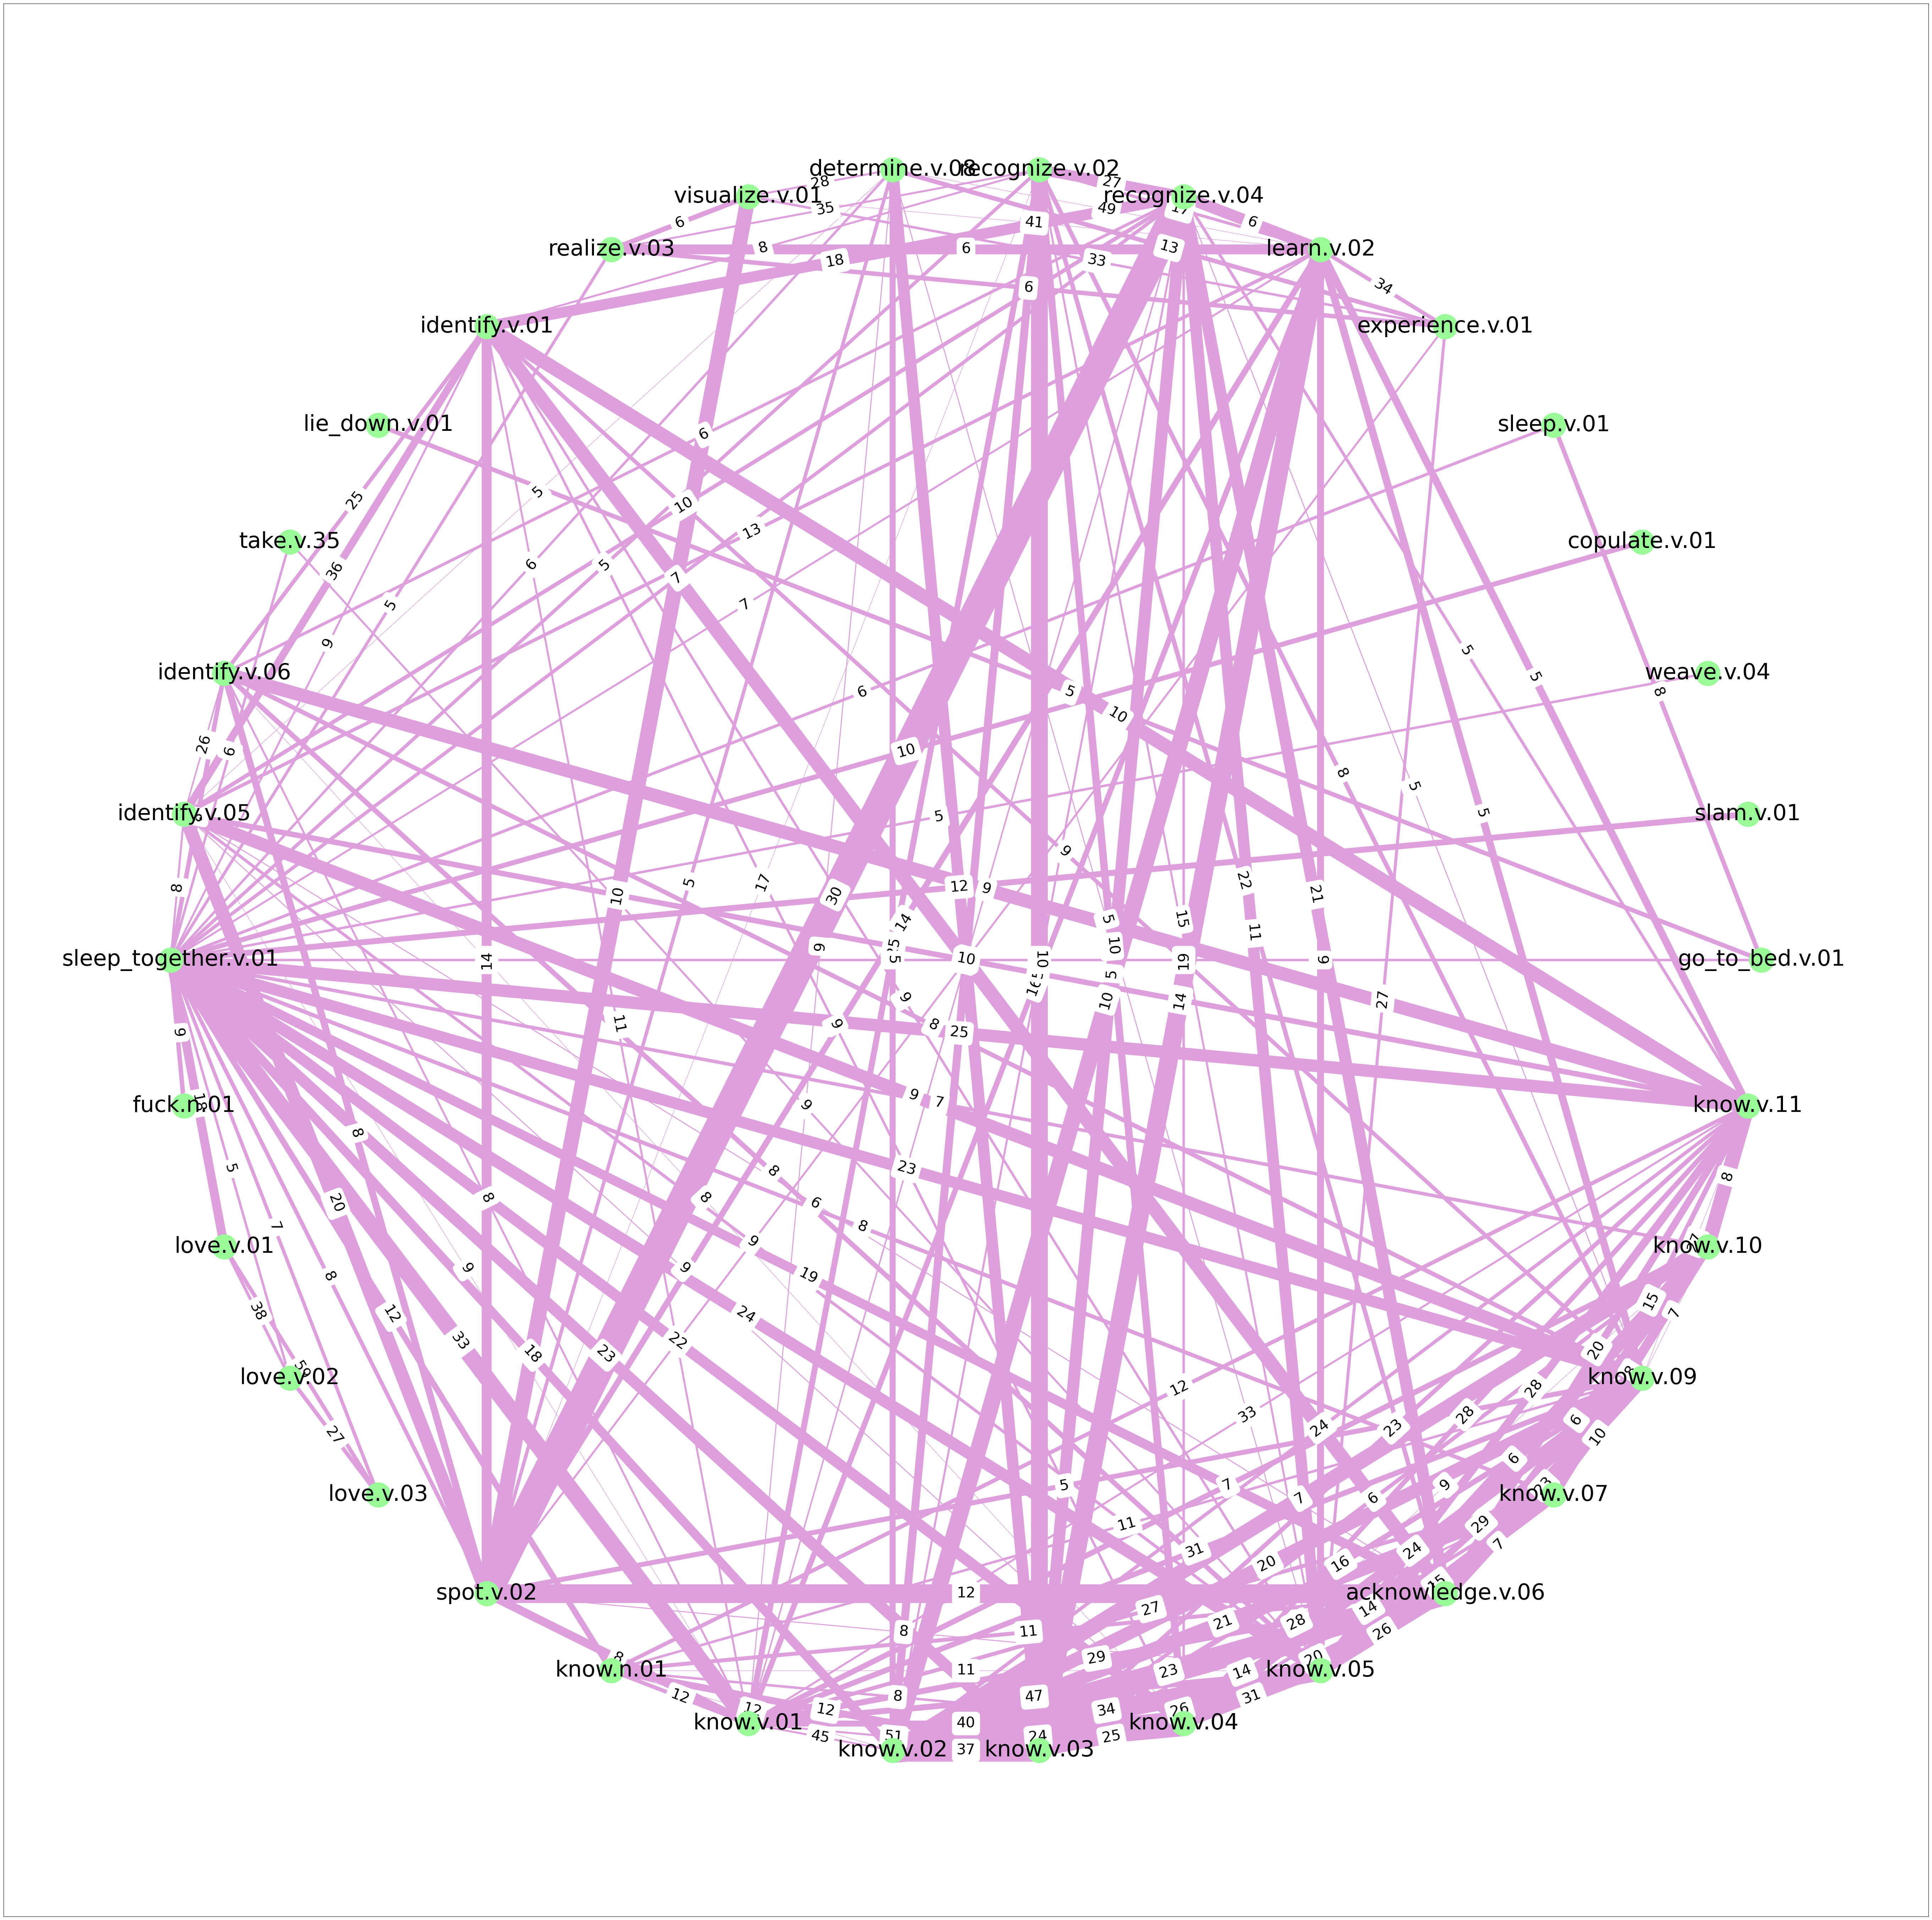

In [45]:
#надо выбрать способ "укладки" графа: random_layout, shell_layout, spring_layout
pos=nx.shell_layout(light_graph)
plt.figure(figsize=(70, 70))
nx.draw_networkx_edges(light_graph, pos, edge_color='Plum', arrows=False, width = list(labels.values()))

labels = nx.get_edge_attributes(light_graph, 'weight')
nx.draw_networkx_edge_labels(light_graph, pos, edge_labels=labels, font_size=30)

nx.draw_networkx_nodes(light_graph, pos, node_color='PaleGreen', node_size=2500) 
nx.draw_networkx_labels(light_graph, pos, font_size=45)

plt.show()

## Анализ

### Выделение связных компонент

In [46]:
components = nx.components.connected_components(light_graph)

component_lengths = Counter([len(i) for i in components])

component_lengths

Counter({34: 1})

Все еще имеем дело с одной компонентой

### Плотность графа

In [47]:
print('Было:', str(nx.density(graph)))
print('Стало:', str(nx.density(light_graph)))

Было: 0.42245989304812837
Стало: 0.2976827094474153


In [48]:
# Диаметр графа, самый длинный кратчайший путь от одной вершины до другой
print('Было:', str(nx.diameter(graph)))
print('Стало:', str(nx.diameter(light_graph)))

Было: 2
Стало: 4


In [49]:
print('Среднее расстояние было: ', nx.average_shortest_path_length(graph))
print('Среднее расстояние стало: ', nx.average_shortest_path_length(light_graph))

Среднее расстояние было:  1.5775401069518717
Среднее расстояние стало:  1.8003565062388591


Плотность уменьшилась, соответственно, кратчайший путь увеличился

### Коэффициент ассортативности 

насколько вся сеть завязана на основных "хабах" = узлах с большим количеством связей


In [50]:
print('Было:', nx.degree_pearson_correlation_coefficient(graph))
print('Стало:', nx.degree_pearson_correlation_coefficient(light_graph))

Было: -0.12016468740331746
Стало: -0.2289321916791291


Значение хабов стало еще меньше

### Степени и центральность

In [51]:
# топ по количеству степеней
deg = nx.degree_centrality(light_graph)
for n, nodeid in enumerate(sorted(deg, key=deg.get, reverse=True)):
    print(f'{n+1}. {nodeid}')

1. sleep_together.v.01
2. know.v.05
3. know.v.01
4. know.v.09
5. know.v.04
6. acknowledge.v.06
7. know.v.11
8. know.v.02
9. know.v.03
10. learn.v.02
11. recognize.v.04
12. spot.v.02
13. recognize.v.02
14. identify.v.05
15. identify.v.01
16. know.v.07
17. know.v.10
18. determine.v.08
19. identify.v.06
20. know.n.01
21. experience.v.01
22. visualize.v.01
23. realize.v.03
24. love.v.01
25. love.v.02
26. love.v.03
27. go_to_bed.v.01
28. sleep.v.01
29. take.v.35
30. fuck.n.01
31. slam.v.01
32. weave.v.04
33. copulate.v.01
34. lie_down.v.01


Самые большие степени не сдают позиции, но некоторые узлы, например, *lie down* и *take* сильно опустились вниз по рейтингу

In [52]:
#по количеству кратчайших путей, проходящих через узел
b = nx.betweenness_centrality(light_graph)
for n, nodeid in enumerate(sorted(b, key=b.get, reverse=True)):
    print(f'{n+1}. {nodeid}')

1. sleep_together.v.01
2. go_to_bed.v.01
3. know.v.05
4. learn.v.02
5. spot.v.02
6. determine.v.08
7. know.v.01
8. realize.v.03
9. know.v.09
10. recognize.v.02
11. know.v.11
12. acknowledge.v.06
13. know.v.02
14. know.v.03
15. know.v.04
16. recognize.v.04
17. identify.v.05
18. experience.v.01
19. identify.v.01
20. visualize.v.01
21. identify.v.06
22. fuck.n.01
23. love.v.01
24. love.v.02
25. love.v.03
26. know.n.01
27. know.v.07
28. know.v.10
29. slam.v.01
30. weave.v.04
31. copulate.v.01
32. sleep.v.01
33. lie_down.v.01
34. take.v.35


In [53]:
#топ по пути до всех остальных узлов
b = nx.closeness_centrality(light_graph)
for n, nodeid in enumerate(sorted(b, key=b.get, reverse=True)):
    print(f'{n+1}. {nodeid}')

1. sleep_together.v.01
2. know.v.05
3. know.v.01
4. know.v.09
5. acknowledge.v.06
6. know.v.11
7. know.v.02
8. know.v.03
9. know.v.04
10. learn.v.02
11. recognize.v.04
12. spot.v.02
13. recognize.v.02
14. identify.v.05
15. identify.v.01
16. determine.v.08
17. identify.v.06
18. know.v.07
19. know.v.10
20. know.n.01
21. realize.v.03
22. go_to_bed.v.01
23. love.v.01
24. love.v.02
25. love.v.03
26. sleep.v.01
27. take.v.35
28. fuck.n.01
29. slam.v.01
30. weave.v.04
31. copulate.v.01
32. experience.v.01
33. visualize.v.01
34. lie_down.v.01


In [54]:
#топ по друзьям
b = nx.eigenvector_centrality(light_graph)
for n, nodeid in enumerate(sorted(b, key=b.get, reverse=True)):
    print(f'{n+1}. {nodeid}')

1. sleep_together.v.01
2. know.v.05
3. know.v.01
4. know.v.09
5. acknowledge.v.06
6. know.v.11
7. know.v.04
8. recognize.v.04
9. know.v.02
10. know.v.03
11. identify.v.05
12. learn.v.02
13. recognize.v.02
14. identify.v.01
15. spot.v.02
16. know.v.07
17. know.v.10
18. identify.v.06
19. know.n.01
20. determine.v.08
21. experience.v.01
22. realize.v.03
23. visualize.v.01
24. take.v.35
25. love.v.01
26. love.v.02
27. love.v.03
28. go_to_bed.v.01
29. sleep.v.01
30. fuck.n.01
31. slam.v.01
32. weave.v.04
33. copulate.v.01
34. lie_down.v.01


Все еще самыми важными оказываются узлы *sleep_together* и *know.v.05*, betweenness_centrality также выделяет *go_to_bed*

К самым незначимым добавляется *lie down*

### Разбиение на сообщества

In [55]:
# в какой степени узлы стремятся разбиться на сообщетсва
print('Было: ', nx.average_clustering(graph))
print('Стало: ', nx.average_clustering(light_graph))

Было:  0.7812119767018296
Стало:  0.6728398987624116


Коэффициент стал ниже

In [56]:
communities_generator = community.girvan_newman(light_graph) # убирает постепенно по ребру с наиболее высокой betweenness centrality
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print("top level communities:", sorted(map(sorted, top_level_communities)))
print("next level communities:", sorted(map(sorted, next_level_communities)))

top level communities: [['acknowledge.v.06', 'copulate.v.01', 'determine.v.08', 'experience.v.01', 'fuck.n.01', 'identify.v.01', 'identify.v.05', 'identify.v.06', 'know.n.01', 'know.v.01', 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'know.v.07', 'know.v.09', 'know.v.10', 'know.v.11', 'learn.v.02', 'love.v.01', 'love.v.02', 'love.v.03', 'realize.v.03', 'recognize.v.02', 'recognize.v.04', 'slam.v.01', 'sleep_together.v.01', 'spot.v.02', 'take.v.35', 'visualize.v.01', 'weave.v.04'], ['go_to_bed.v.01', 'lie_down.v.01', 'sleep.v.01']]
next level communities: [['acknowledge.v.06', 'copulate.v.01', 'determine.v.08', 'experience.v.01', 'identify.v.01', 'identify.v.05', 'identify.v.06', 'know.n.01', 'know.v.01', 'know.v.02', 'know.v.03', 'know.v.04', 'know.v.05', 'know.v.07', 'know.v.09', 'know.v.10', 'know.v.11', 'learn.v.02', 'love.v.01', 'love.v.02', 'love.v.03', 'realize.v.03', 'recognize.v.02', 'recognize.v.04', 'slam.v.01', 'sleep_together.v.01', 'spot.v.02', 'take.v.35', 'visuali

В первом разбиении выделяется вполне осмысленная группа глаголов сна. Во вотором добавляется еще одна группа с синсетом *fuck*

In [57]:
communities_generator_2 = community.greedy_modularity_communities(light_graph) # данный алгоритм использует модулярность, которая в свою очередь опирается на плотность связей внутри группы
communities_generator_2

[frozenset({'acknowledge.v.06',
            'identify.v.01',
            'identify.v.06',
            'know.n.01',
            'know.v.01',
            'know.v.02',
            'know.v.03',
            'know.v.04',
            'know.v.05',
            'know.v.07',
            'know.v.09',
            'know.v.10',
            'know.v.11',
            'recognize.v.02',
            'recognize.v.04',
            'take.v.35'}),
 frozenset({'copulate.v.01',
            'fuck.n.01',
            'go_to_bed.v.01',
            'lie_down.v.01',
            'love.v.01',
            'love.v.02',
            'love.v.03',
            'slam.v.01',
            'sleep.v.01',
            'sleep_together.v.01',
            'weave.v.04'}),
 frozenset({'determine.v.08',
            'experience.v.01',
            'identify.v.05',
            'learn.v.02',
            'realize.v.03',
            'spot.v.02',
            'visualize.v.01'})]

Две группы глаголв познания, в третьей - все остальное

In [58]:
community.kernighan_lin_bisection(light_graph, seed = 42)

({'acknowledge.v.06',
  'identify.v.01',
  'identify.v.05',
  'identify.v.06',
  'know.n.01',
  'know.v.01',
  'know.v.02',
  'know.v.03',
  'know.v.04',
  'know.v.05',
  'know.v.07',
  'know.v.09',
  'know.v.11',
  'recognize.v.02',
  'recognize.v.04',
  'sleep_together.v.01',
  'spot.v.02'},
 {'copulate.v.01',
  'determine.v.08',
  'experience.v.01',
  'fuck.n.01',
  'go_to_bed.v.01',
  'know.v.10',
  'learn.v.02',
  'lie_down.v.01',
  'love.v.01',
  'love.v.02',
  'love.v.03',
  'realize.v.03',
  'slam.v.01',
  'sleep.v.01',
  'take.v.35',
  'visualize.v.01',
  'weave.v.04'})

Все еще есть тенденция выделить в отдельную группу глаголы познания, но это выглядит более грязно, чем в предыдущем разбиении

In [59]:
list(nx.community.k_clique_communities(light_graph, 4))

[frozenset({'acknowledge.v.06',
            'determine.v.08',
            'experience.v.01',
            'identify.v.01',
            'identify.v.05',
            'identify.v.06',
            'know.n.01',
            'know.v.01',
            'know.v.02',
            'know.v.03',
            'know.v.04',
            'know.v.05',
            'know.v.07',
            'know.v.09',
            'know.v.10',
            'know.v.11',
            'learn.v.02',
            'realize.v.03',
            'recognize.v.02',
            'recognize.v.04',
            'sleep_together.v.01',
            'spot.v.02',
            'visualize.v.01'}),
 frozenset({'love.v.01', 'love.v.02', 'love.v.03', 'sleep_together.v.01'})]

In [60]:
list(nx.community.k_clique_communities(light_graph, 3))

[frozenset({'acknowledge.v.06',
            'determine.v.08',
            'experience.v.01',
            'identify.v.01',
            'identify.v.05',
            'identify.v.06',
            'know.n.01',
            'know.v.01',
            'know.v.02',
            'know.v.03',
            'know.v.04',
            'know.v.05',
            'know.v.07',
            'know.v.09',
            'know.v.10',
            'know.v.11',
            'learn.v.02',
            'realize.v.03',
            'recognize.v.02',
            'recognize.v.04',
            'sleep_together.v.01',
            'spot.v.02',
            'take.v.35',
            'visualize.v.01'}),
 frozenset({'love.v.01', 'love.v.02', 'love.v.03', 'sleep_together.v.01'}),
 frozenset({'go_to_bed.v.01', 'sleep.v.01', 'sleep_together.v.01'})]

Если допустить минимальный размер клики 3, а не 4, результат выглядит лучше

Как и до этого, выделяются глаголы познания, глаголы типа *love* и глаголы сна

In [61]:
community.louvain_communities(light_graph)

[{'copulate.v.01',
  'fuck.n.01',
  'go_to_bed.v.01',
  'lie_down.v.01',
  'love.v.01',
  'love.v.02',
  'love.v.03',
  'slam.v.01',
  'sleep.v.01',
  'sleep_together.v.01',
  'take.v.35',
  'weave.v.04'},
 {'acknowledge.v.06',
  'know.n.01',
  'know.v.01',
  'know.v.02',
  'know.v.03',
  'know.v.04',
  'know.v.05',
  'know.v.07',
  'know.v.09',
  'know.v.10',
  'know.v.11'},
 {'determine.v.08', 'experience.v.01', 'learn.v.02', 'visualize.v.01'},
 {'identify.v.01',
  'identify.v.05',
  'identify.v.06',
  'realize.v.03',
  'recognize.v.02',
  'recognize.v.04',
  'spot.v.02'}]

Хорошо выделяются глаголы сна и глаголы типа *love*, но в группе глаголов типа *know* примешаны другие, слэнговые

### Вывод
Граф с более устойчивыми связями более информативный: благодаря тому, что из него удален "шум", разбиение на группы становится более четким. Напрмер, в методе girvan_newman выделяется в отдельное сообщество не только *fuck*, но и глаголы сна. greedy_modularity_communities позволяет разделить сферу глаголов познания на 2: в первой глаглы чисто умственной деятельности (*know*, *recognize*), в другой больше связанные с опытом, наблюдением и органами чувств (*experience*, *learn*, *visualize*)

# Шаг 6 (1 балл)
Подведите небольшой теоретический итог. Какие выводы о колексификациях в зоне глаголов поиска позволяют сделать эти два графа?

Как и ожидалось, в зоне глаголов, обозначающих сексуальное взаиможействие, можно выделить много глаголов из других зон, которые колексифицируются друг с другом. При этом глаголы, у которых основное знание 'заниматься сексом' (синсет *fuck*) колексифицирется редко, то есть для этого понятия "зарезервированно" отдельное слово, которое не используется для других сфер. Это говорит о табуированности этого понятия.

Центральным же концептом в этой сфере яляются глаголы со значением 'спать вместе'. С ними колексефицируются все остальные типы глаголов. Заметим, что другие синсеты связанные со сном (*sleep*, *go to bed*, *lie down*) имеют гораздо меньшее значение.

Большую область здесь составляют разного рода глаголы умственной деятельности, по большей части именно со значением 'знать', 'познать'. Как кажется, это один из самых древних способов перифраза значений из этой области.

Также в отдельную область можно выделить глаголы со значением 'любить':
   * испытывать чувства ('love.v.01')
   * получать удовльствие от чего-то ('love.v.02')
   * быть влюбленным ('love.v.03')
   
Они тесно колексикализуются между собой (на графе предсталяют треугольник), но также колексикализуются с центральным в этой сфере понятием 'спать всместе' (ср. в русском глагол *любить* может выражать все эти значения).

Также отдельно стоит выделить некоторые зоны глаголов, слабо по смыслу относящиеся к рассматриваемой зоне. Они редко колексикализуются с другими глаголами и в языке становятся сленговыми: *slam* 'хлопать , резко ударять' (ср. в русском близкое по смыслу сленговое *чпокаться*), *weave* 'плести'.

# Шаг 7 (бонусный, 1 балл)
Сравните ваши графы с подграфом LOOK FOR из базы CLICS. Что общего, в чем отличия? С чем эти отличия могут быть связаны?

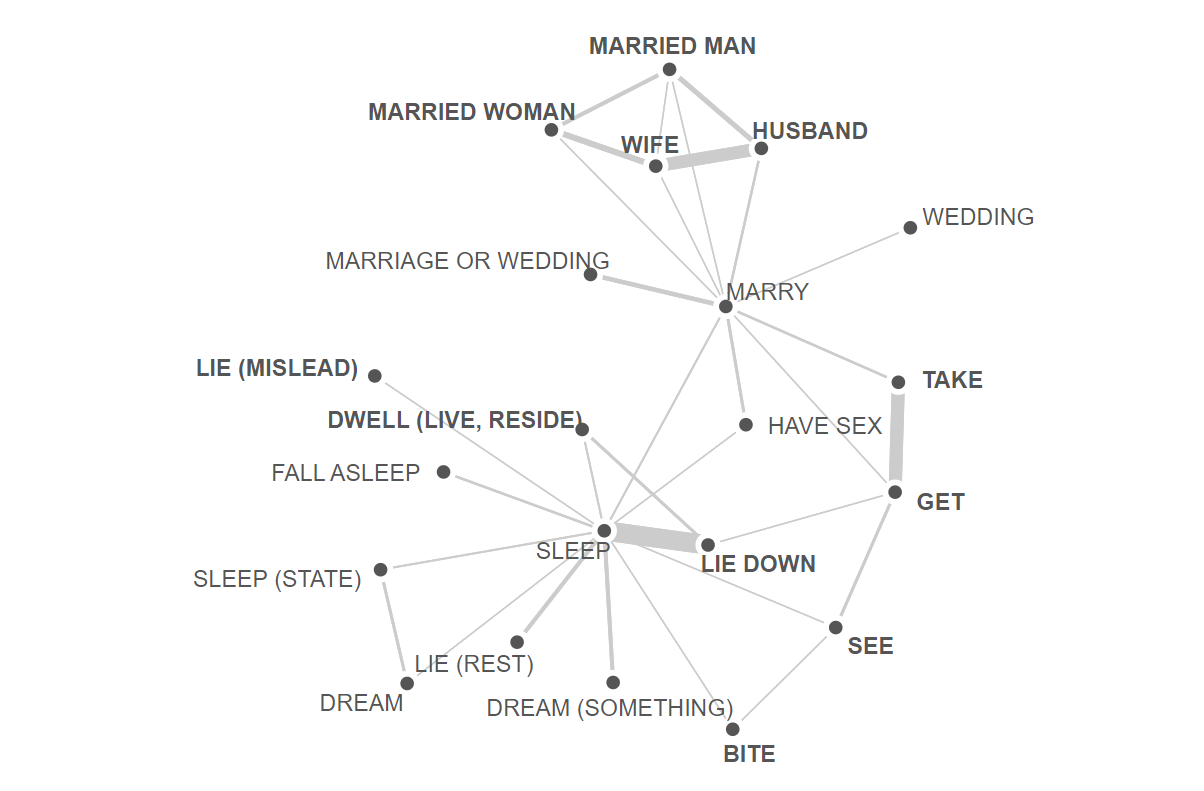

Рассмотрим подграф для *HAVE SEX* из CLICS 

Сходство состоит лишь в том, что *SLEEP* колексиколизовано с *HAVE SEX*. 

Заметим, что граф в целом менее плотный. Возможно, это различие связано с расзными устройствами базы: в CLICS классификация менее дробная, отдельного концепта для значения 'спать всместе', которе было центральным в моем графе, нет вовсе. 

Также мы не видим колексификаций с глаголами из других зон: значимая в моем графе зона 'знать', другие понятия, как 'fuck', 'slam', 'weave'. Отсутвие зоны 'знать' может быть также обусловлено менее дробной классификацией: в базе нет отдельного слова для ключевого в моем графе синсета *know.v.05 ('have firsthand knowledge of states, situations, emotions, or sensations')*. Отсутсвие же других глаголов может быть вызвано размером базы: если в источниках, на которых собирался CLICS, приведено мало подобным лексем, то и на графе они отражены не будут. А поскольку многие из них могут считаться ненормативными в языках, то мы ожидаем их редкую зафиксированность в словарях и базах данным.

Таким образом, различия обсуловлены разной природой ресурсов. WordNet, собранный вручную, имеет более дробную классификацию и приводит лексику из разных сфер жизни. В CLICS же количество концептов ограничено. Также данные собраны автоматически, и, возможно, поэтому выборка базы несбалансирована по разным регистрам речи.